In [ ]:
!pip install pyDOE

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pyDOE import lhs

**Elastodynamics as in paper**

In [ ]:
def DelSrcPT(XYT_c, xc, yc, r):
  dst = np.array([((xyt[0]-xc)**2 + (xyt[1]-yc)**2)**0.5 for xyt in XYT_c])
  return XYT_c[dst>r, :]

def GenCirclePT(xc, yc, r, N_PT):
  theta = np.linspace(0.0, np.pi*2.0, N_PT)
  xx = np.multiply(r, np.cos(theta)) + xc
  yy = np.multiply(r, np.sin(theta)) + yc
  xx = xx.flatten()[:, None]
  yy = yy.flatten()[:, None]
  theta = theta.flatten()[:,None]
  return xx, yy, theta

In [ ]:
PI = math.pi
MAX_T = 20.0

# Domain bounds
lb = np.array([0.0, 0.0, 0.0])
ub = np.array([30, 30, MAX_T])

# Properties of source
xc_src = 15.0
yc_src = 15.0
r_src = 2.0

# upper boundary point
x_up = np.linspace(0,30, 150)
t_up = np.linspace(0, MAX_T, 201)
x_up, t_up = np.meshgrid(x_up, t_up)
x_up = x_up.flatten()[:, None]
t_up = t_up.flatten()[:, None]
y_up = np.zeros((x_up.size, 1))
y_up.fill(30.0)
UP = np.concatenate((x_up, y_up, t_up), 1)

# Collocation points
N_f = 120
XYT_c = lb + (ub-lb) * lhs(3, N_f)
XYT_c_ext = np.array([xc_src - r_src -1, yc_src - r_src -1, 0.0]) + np.array([2*(r_src+1), 2*(r_src+1), MAX_T]) * lhs(3, 200)
XYT_c = np.concatenate((XYT_c, XYT_c_ext), axis = 0)
XYT_c = DelSrcPT(XYT_c, xc=xc_src, yc=yc_src, r=r_src)

# Wave source point in the middle, x = 15.0, y = 30.0
tsh = 3.0
ts = 3.0
Amp = 1.0
xx, yy, theta = GenCirclePT(xc=xc_src, yc=yc_src, r=r_src, N_PT= 20) # N_PT = number points on circle
tt = np.linspace(0, MAX_T, 1000)
tt = tt[1:]
x_SRC, t_SRC = np.meshgrid(xx, tt)
y_SRC, _     = np.meshgrid(yy, tt)
x_SRC = x_SRC.flatten()[:, None]
y_SRC = y_SRC.flatten()[:, None]
t_SRC = t_SRC.flatten()[:, None]
amplitude = Amp*(2*PI**2*(t_SRC - ts)**2/tsh**2 - 1) * np.exp(-PI**2*(t_SRC-ts)**2/tsh**2)
u_SRC = amplitude*(x_SRC-xc_src)/r_src
v_SRC = amplitude*(y_SRC-yc_src)/r_src
SRC = np.concatenate((x_SRC, y_SRC, t_SRC, u_SRC, v_SRC), 1)
# Sinewave
excitation = 20*np.sin(30*PI*t_SRC/20)# change for this and run

NameError: ignored

In [ ]:
np.shape(xx)

(20, 1)

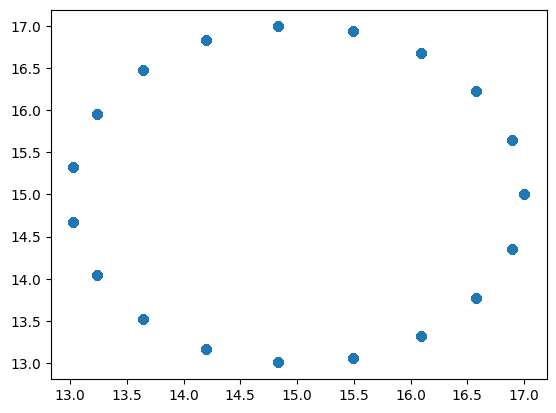

In [ ]:
plt.scatter(x_SRC,y_SRC, marker='o', alpha=0.2 )
plt.show()

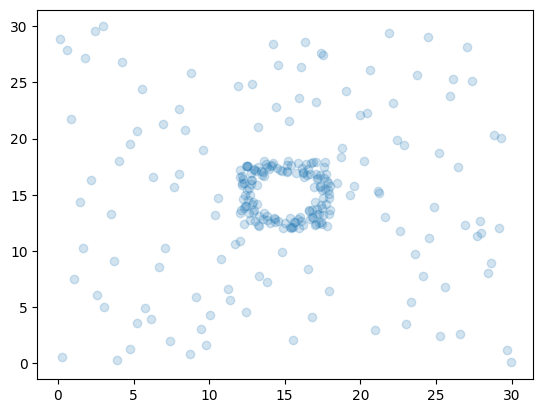

In [ ]:
plt.scatter(XYT_c[:, 0], XYT_c[:, 1], marker='o', alpha=0.2 )
plt.show()

In [ ]:
np.shape(XYT_c)

(256, 3)

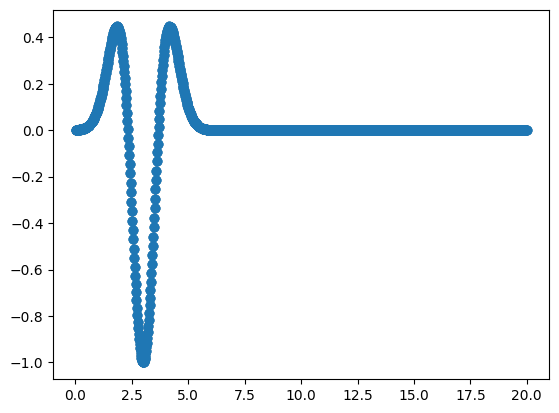

In [ ]:
plt.scatter(t_SRC, amplitude, marker='o', alpha=0.2 )
plt.show()

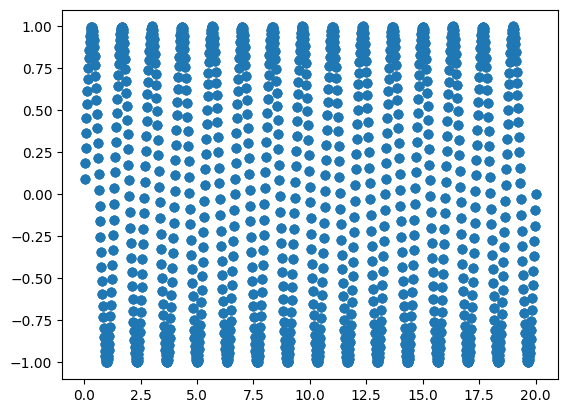

In [ ]:
plt.scatter(t_SRC, excitation, marker='o', alpha=0.2 )
plt.show()

**Your implementation**

In [ ]:
Lx = 0.3
c = 4773.343
Vamp = 1e-8
fex = 120000
cycles = 5
tsim = 1.32*Lx/2/c # MAX_T

# Domain bounds
lb_my = np.array([0.0, 0.0, 0.0])
ub_my = np.array([0.3, 0.3, tsim])


# Properties of source
xc_src_my = Lx/2 # 0.15
yc_src_my = Lx/2 # 0.15
r_src_my = Lx/64 # 0.00467 ~ 0.005 # Lx/128 ~ 0.00234


# Collocation points
N_f_my = 120
XYT_c_my = lb_my + (ub_my - lb_my) * lhs(3, N_f_my)
XYT_c_ext_my = np.array([xc_src_my - r_src_my - 0.001, yc_src_my - r_src_my - 0.001, 0.0]) + np.array([2*(r_src_my + 0.001), 2*(r_src_my + 0.001), tsim]) * lhs(3, 80)
XYT_c_my = np.concatenate((XYT_c_my, XYT_c_ext_my), axis = 0)
XYT_c_my = DelSrcPT(XYT_c_my, xc = xc_src_my, yc = yc_src_my, r = r_src_my)
xx_my , yy_my, theta_my = GenCirclePT(xc = xc_src_my, yc=yc_src_my, r=r_src_my, N_PT=50)   #
tt_my = np.linspace(0, tsim, 1000)
x_SRC_my, t_SRC_my = np.meshgrid(xx_my, tt_my)
y_SRC_my, _     = np.meshgrid(yy_my, tt_my)
x_SRC_my = x_SRC_my.flatten()[:, None]
y_SRC_my = y_SRC_my.flatten()[:, None]
t_SRC_my = t_SRC_my.flatten()[:, None]
sineburst = Vamp * np.sin(2*PI*fex*(tt_my)) * np.sin(PI*fex/cycles*tt_my)**2

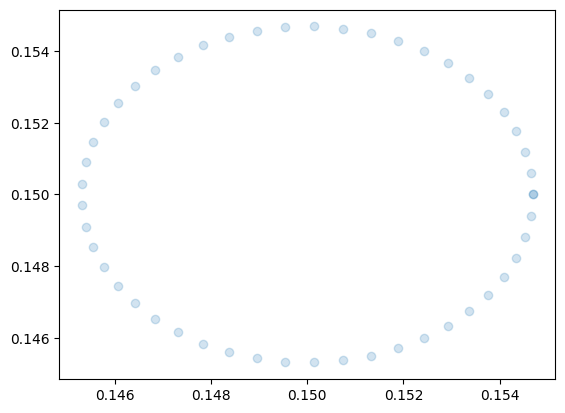

In [ ]:
plt.scatter(xx_my, yy_my, marker='o', alpha=0.2 )
plt.show()

In [ ]:
np.shape(x_SRC_my)

(50000, 1)

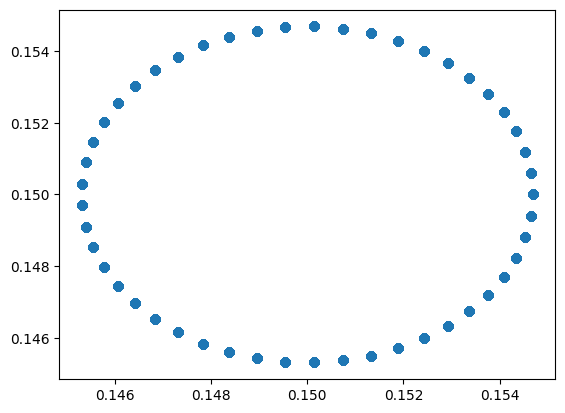

In [ ]:
plt.scatter(x_SRC_my, y_SRC_my, marker='o', alpha=0.5 )
plt.show()

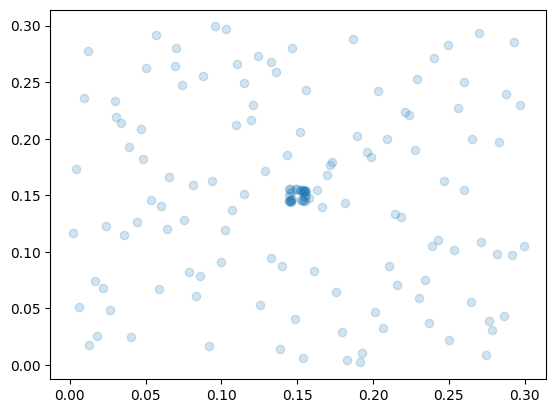

In [ ]:
plt.scatter(XYT_c_my[:, 0], XYT_c_my[:, 1], marker='o', alpha=0.2 )
plt.show()


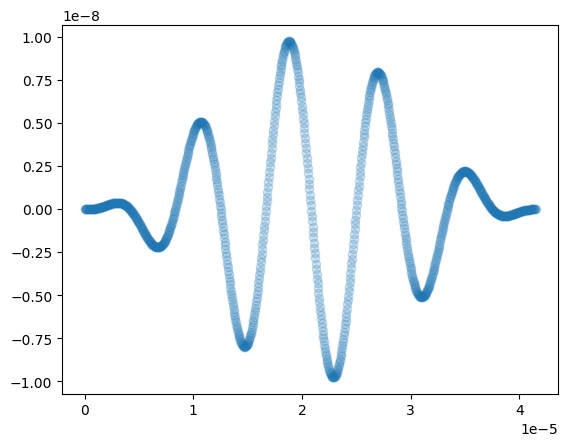

In [ ]:
plt.scatter(tt_my, sineburst, marker='o', alpha=0.2 )
plt.show()